In [2]:
from biocrnpyler import Compartment

cytosol = Compartment("cytosol")
peroxisome = Compartment("peroxisome")
ER = Compartment ("ER")

#Size
cytosol = Compartment("cytosol", spatial_dimensions=3, size=1.0, initial_volume=1.0)
ER = Compartment("ER", spatial_dimensions=3, size=1.0, initial_volume=1.0)

Species = Glutamic_acid_cytosol, Arginine_cytosol, Ornithine_cytosol, Spermine_cytosol, Putrescine_cytosol, Agmatine_cytosol, Spermidine_cytosol, Arg2_enzyme_cytosol, AsADC_enzyme_cytosol, speB_enzyme_cytosol, Car1_enzyme_cytosol, Spe1_enzyme_cytosol, Fms1_enzyme_cytosol
Reactions = [
	Glutamic_acid+Arg2_enzyme --> Arginine
	Arginine+AsADC_enzyme --> Agmatine
	Agmatine+speB_enzyme --> Putrescine
	Arginine+Car1_enzyme --> Ornithine
	Ornithine+Spe1_enzyme --> Putrescine
	Spermine+Fms1_enzyme --> Spermidine
	Spermidine+Fms1_enzyme --> Putrescine
]
MODULE 1: PUTRESCINE BIOSYNTHESIS
Species = Glutamic_acid_cytosol, Arginine_cytosol, Ornithine_cytosol, Spermine_cytosol, Putrescine_cytosol, Agmatine_cytosol, Spermidine_cytosol, Arg2_enzyme_cytosol, AsADC_enzyme_cytosol, speB_enzyme_cytosol, Car1_enzyme_cytosol, Spe1_enzyme_cytosol, Fms1_enzyme_cytosol
Reactions = [
	First and Second Biochemical Route: Glumatic_Acid → Putrescine
	Glutamic_acid+Arg2_enzyme --> Arginine

	Parallel Reactions: Pat

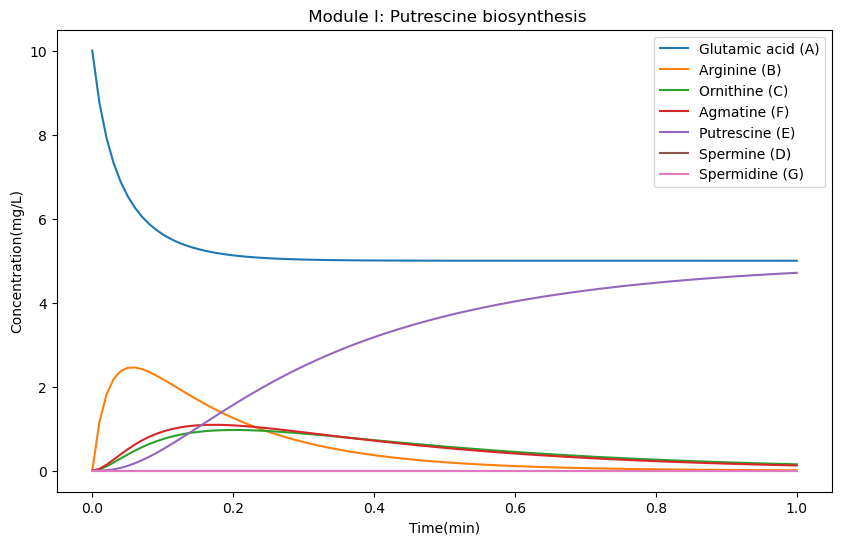

In [46]:
# Module 1: Putrescine Biosynthesis Pathway
# This module describes the biosynthesis of putrescine from glutamic acid through multiple biochemical routes

from biocrnpyler import Species, Reaction, ChemicalReactionNetwork

# Define species (cytosolic metabolites)
A = Species("Glutamic_acid", compartment=cytosol)
B = Species("Arginine", compartment=cytosol)
C = Species("Ornithine", compartment=cytosol)
D = Species("Spermine", compartment=cytosol)
E = Species("Putrescine", compartment=cytosol)
F = Species("Agmatine", compartment=cytosol)
G = Species("Spermidine", compartment=cytosol)

# Enzymes (cytosolic)
Arg2  = Species("Arg2_enzyme", compartment=cytosol)
AsADC = Species("AsADC_enzyme", compartment=cytosol)
speB  = Species("speB_enzyme", compartment=cytosol)
Car1  = Species("Car1_enzyme", compartment=cytosol)
Spe1  = Species("Spe1_enzyme", compartment=cytosol)
Fms1  = Species("Fms1_enzyme", compartment=cytosol) 


# Reaction rates
k1 = 3.0
k2 = 1.4
k3 = 1.0 
k4 = 1.0

# Reactions 

# Reaction from Glutamic acid(A)→ Arginine(B) via Arg2
R1_module1 = Reaction.from_massaction([A, Arg2], [B], k_forward=k1)

# Parallel Path 1: Arginine(B) → Agmatine(F) via AsADC / Agamatine(F) → Putrescine (E) via SpeB
R2_module1 = Reaction.from_massaction([B, AsADC], [F], k_forward=k2)
R3_module1 = Reaction.from_massaction([F, speB], [E], k_forward=k2)

# Parallel Path 2: Arginine(B) → Ornithine(C) via Car1/ Ornithine(C) → Putrescine (E) via Spe1
R4_module1 = Reaction.from_massaction([B, Car1], [C], k_forward=k3)
R5_module1 = Reaction.from_massaction([C, Spe1], [E], k_forward=k3)

# 3rd Biochemical Route: Spermine(D) → Spermidine(G) → Putrescine (E)
R6_module1 = Reaction.from_massaction([D, Fms1,], [G], k_forward=k4)
R7_module1 = Reaction.from_massaction([G, Fms1,], [E], k_forward=k4)

# Create CRN
CRN = ChemicalReactionNetwork(
    species=[A, B, C, D, E, F, G, Arg2, AsADC, speB, Car1, Spe1, Fms1],
    reactions=[R1_module1, R2_module1, R3_module1, R4_module1, R5_module1, R6_module1, R7_module1])

print(CRN)

# Custom output with parallel reaction labeling
print ("MODULE 1: PUTRESCINE BIOSYNTHESIS")
print("Species = " + ", ".join([str(s) for s in CRN.species]))
print("Reactions = [")
print("\tFirst and Second Biochemical Route: Glumatic_Acid → Putrescine")
print(f"\t{R1_module1}")  # Glutamic_acid + Arg2_enzyme --> Arginine

#Blank Line
print()

# Parallel Path 1
print("\tParallel Reactions: Path 1 - Arginine → Agmatine → Putrescine")
print(f"\t{R2_module1}")  # Arginine + AsADC_enzyme --> Agmatine
print(f"\t{R3_module1}")  # Agmatine + speB_enzyme --> Putrescine

#Blank Line
print()

# Parallel Path 2
print("\tParallel Reactions: Path 2 - Arginine → Ornithine → Putrescine")
print(f"\t{R4_module1}")  # Arginine + Car1_enzyme --> Ornithine
print(f"\t{R5_module1}")  # Ornithine + Spe1_enzyme --> Putrescine

#Blank Line
print()

# Third Biochemical Route
print("\tThird Biochemical Route: Spermine → Spermidine → Putrescine")
print(f"\t{R6_module1}")  # Spermine + Fms1_enzyme --> Spermidine
print(f"\t{R7_module1}")  # Spermidine + Fms1_enzyme --> Putrescine
print("]")

CRN.write_sbml_file("Module1.xml")

# Simulate and plot
try:
    import bioscrape
    import numpy as np
    import pylab as plt
    import pandas as pd

    # Correct initial conditions

    x0 = {
        "Glutamic_acid_cytosol": 10,
        "Arginine_cytosol": 0,
        "Ornithine_cytosol": 0,
        "Spermine_cytosol": 0,
        "Putrescine_cytosol": 0,
        "Agmatine_cytosol": 0,
        "Spermidine_cytosol": 0,
        "Arg2_enzyme_cytosol": 5,
        "AsADC_enzyme_cytosol": 5,
        "speB_enzyme_cytosol": 5,
        "Car1_enzyme_cytosol": 5,
        "Spe1_enzyme_cytosol": 5,
        "Fms1_enzyme_cytosol": 5
    }


    timepoints = np.linspace(0, 1, 100)

    # Run the simulation
    R = CRN.simulate_with_bioscrape_via_sbml(timepoints=timepoints, initial_condition_dict=x0)

    # Plot results
    plt.figure(figsize=(10, 6))
    plt.plot(R['time'], R["Glutamic_acid_cytosol"], label="Glutamic acid (A)")
    plt.plot(R['time'], R["Arginine_cytosol"], label="Arginine (B)")
    plt.plot(R['time'], R["Ornithine_cytosol"], label="Ornithine (C)")
    plt.plot(R['time'], R["Agmatine_cytosol"], label="Agmatine (F)")
    plt.plot(R['time'], R["Putrescine_cytosol"], label="Putrescine (E)")
    plt.plot(R['time'], R["Spermine_cytosol"], label="Spermine (D)")
    plt.plot(R['time'], R["Spermidine_cytosol"], label="Spermidine (G)")
    plt.legend()
    plt.xlabel("Time(min)")
    plt.ylabel("Concentration(mg/L)")
    plt.title(" Module I: Putrescine biosynthesis")
    

except ModuleNotFoundError:
    print("Plotting Modules not installed.")




In [40]:
from biocrnpyler import Compartment

cytosol = Compartment("cytosol")
peroxisome = Compartment("peroxisome")
ER = Compartment ("ER")

#Size
cytosol = Compartment("cytosol", spatial_dimensions=3, size=1.0, initial_volume=1.0)
ER = Compartment("ER", spatial_dimensions=3, size=1.0, initial_volume=1.0)

# Module II:Tropine biosynthesis
from biocrnpyler import Species, Reaction, ChemicalReactionNetwork

# Define species/ A=4
AA = Species("Putrescine", compartment=cytosol)
BB = Species("N_methylputrescine", compartment=cytosol)
CC = Species("Methylaminobutanal", material_type="compound", compartment=cytosol)
DD = Species("N_Methyl_pyrrolinium", compartment=cytosol)
EE = Species("Pyrrolidinyl_oxobutanoic_acid", compartment=cytosol)
FF = Species("Tropinone",compartment=cytosol)
GG = Species("Tropine",compartment= cytosol)

# Enzymes
AbPMT1_DsPMT1= Species("AbPMT1_DsPMT1_enzyme", compartment=cytosol)
DmMPO1C = Species("DmMPO1ΔC_PTS1_enzyme", compartment=peroxisome)
AbPYKS = Species("AbPYKS_enzyme_and_2x_malonyl_CoA_molecules",compartment= cytosol)
AbCYP82M3_AtATR1 = Species("AbCYP82M3_AtATR1_enzyme",compartment= ER) 
DsTR1 = Species("DsTR1_enzyme",compartment= cytosol) 


# Reaction rates
k1 = 3.0
k2 = 1.4
k3 = 1.0 
k4 = 1.0
k5 = 1.0

# Step 1: Putrescine (AA) → N-Methylputrescine (BB) via AbPMT1,DsPMT1
R1_module2= Reaction.from_massaction([AA, AbPMT1_DsPMT1 ], [BB], k_forward=k1)

# Step 2: N-methylputrescine(BB) → 4-Methylaminobutanal (CC) via DmMPO1ΔC_PTS1 (This step occurs in the Peroxisome)
R2_module2 = Reaction.from_massaction([BB, DmMPO1C], [CC], k_forward=k2)

# Step 3: 4-Methylaminobutanal(CC) → N-Methyl-Δ1-pyrrolinium (DD) (Reaction occurs spontaneously)
R3_module2 = Reaction.from_massaction([CC], [DD], k_forward=k3)

# Step 4: N-Methyl-Δ1-pyrrolinium(DD)→ 4-(1-Methyl-2-pyrrodinyl)-3-oxobutanoic acids (EE) 
R4_module2 = Reaction.from_massaction([DD, AbPYKS], [EE], k_forward=k4)

#Step 5:  4-(1-Methyl-2-pyrrodinyl)-3-oxobutanoic acids (EE) → Tropinone (FF) this reaction (ring formation) occurs in the ER
R5_module2 = Reaction.from_massaction([EE,AbCYP82M3_AtATR1], [FF], k_forward=k4)

# Step 6:Tropinone(FF) → Tropine(GG)
R6_module2 = Reaction.from_massaction([FF, DsTR1], [GG], k_forward=k5)

# Create CRN
CRN = ChemicalReactionNetwork(species=[AA, BB, CC, DD, EE, FF, GG, AbPMT1_DsPMT1, DmMPO1C, AbPYKS, AbCYP82M3_AtATR1, DsTR1], reactions=[R1_module2, R2_module2, R3_module2, R4_module2, R5_module2, R6_module2])

print (CRN)

# Custom output with parallel reaction labeling
print ("MODULE 2: TROPINE BIOSYNTHESIS")
print("Species = " + ", ".join([str(s) for s in CRN.species]))
print("Reactions = [")
#Step 1
print("\tStep 1: Putrescine → N-Methylputrescine")
print(f"\t{R1_module2}")  

#Blank Line
print()

# Step 2
print("\tStep 2: N-methylputrescine → 4-Methylaminobutanal *Occurs in Peroxisome*")
print(f"\t{R2_module2}") 
#Blank Line
print()

# Step 3
print("\tStep 3: 4-Methylaminobutanal → N-Methyl-1-pyrrolinium (Spontaneous)")
print(f"\t{R3_module2}")  
#Blank Line
print()

# Step 4
print("\tStep 4: N-Methyl-1-pyrrolinium → 4-(1-Methyl-2-pyrrodinyl)-3-oxobutanoic acids" )
print(f"\t{R4_module2}")  

#Blank Line
print()

#Step 5
print("\tStep 5: 4-(1-Methyl-2-pyrrodinyl)-3-oxobutanoic acids → Tropinone")
print(f"\t{R5_module2}")

#Blank Line
print()

# Step 6
print("\tStep 6:Tropinone → Tropine")
print(f"\t{R6_module2}")  
print("]")

# Stimulate and plot
CRN.write_sbml_file("Module II:Tropine biosynthesis.xml") 
try:
    import bioscrape
    import numpy as np
    import matplotlib.pyplot as plt
    import pandas as pd

    # Initial conditions 
    x0 = {
        "Putrescine": 10,
        "N_methylputrescine": 0,
        "Methylaminobutanal": 0,
        "N_Methyl_pyrrolinium": 0,
        "Pyrrolidinyl_oxobutanoic_acid": 0,
        "Tropinone": 0,
        "Tropine": 0
    }

    timepoints = np.linspace(0, 1, 100)
    R = CRN.simulate_with_bioscrape_via_sbml(timepoints=timepoints, initial_condition_dict=x0)

    # Plotting results
    plt.plot(R['time'], R["Putrescine"], label="AA")
    plt.plot(R['time'], R["N_methylputrescine"], label="BB")
    plt.plot(R['time'], R["Methylaminobutanal"], label="CC")
    plt.plot(R['time'], R["N_Methyl_pyrrolinium"], label="DD")
    plt.plot(R['time'], R["Pyrrolidinyl_oxobutanoic_acid"], label="EE")
    plt.plot(R['time'], R["Tropinone"], ":", label="FF")
    plt.plot(R['time'], R["Tropine"], ":", label="GG")
    plt.xlabel("Time (min)")
    plt.ylabel("Concentration (mg/L)")
    plt.title("Module II: Tropine biosynthesis")
    plt.legend()
    plt.show()

except ModuleNotFoundError:
    print("Plotting modules not installed.")


Species = Putrescine_cytosol, N_methylputrescine_cytosol, compound_Methylaminobutanal_cytosol, N_Methyl_pyrrolinium_cytosol, Pyrrolidinyl_oxobutanoic_acid_cytosol, Tropinone_cytosol, Tropine_cytosol, AbPMT1_DsPMT1_enzyme_cytosol, DmMPO1ΔC_PTS1_enzyme_peroxisome, AbPYKS_enzyme_and_2x_malonyl_CoA_molecules_cytosol, AbCYP82M3_AtATR1_enzyme_ER, DsTR1_enzyme_cytosol
Reactions = [
	Putrescine+AbPMT1_DsPMT1_enzyme --> N_methylputrescine
	N_methylputrescine+DmMPO1ΔC_PTS1_enzyme --> compound[Methylaminobutanal]
	compound[Methylaminobutanal] --> N_Methyl_pyrrolinium
	N_Methyl_pyrrolinium+AbPYKS_enzyme_and_2x_malonyl_CoA_molecules --> Pyrrolidinyl_oxobutanoic_acid
	Pyrrolidinyl_oxobutanoic_acid+AbCYP82M3_AtATR1_enzyme --> Tropinone
	Tropinone+DsTR1_enzyme --> Tropine
]
MODULE 2: TROPINE BIOSYNTHESIS
Species = Putrescine_cytosol, N_methylputrescine_cytosol, compound_Methylaminobutanal_cytosol, N_Methyl_pyrrolinium_cytosol, Pyrrolidinyl_oxobutanoic_acid_cytosol, Tropinone_cytosol, Tropine_cytosol, 

SyntaxError: SBML File temp_sbml_file.xml cannot be read without errors (<string>)

In [39]:
# Compartment setup
from biocrnpyler import Compartment, Species, Reaction, ChemicalReactionNetwork

# Define compartments (with volume for SBML compatibility)
cytosol = Compartment("cytosol", spatial_dimensions=3, size=1.0, initial_volume=1.0)
peroxisome = Compartment("peroxisome", spatial_dimensions=3, size=1.0, initial_volume=1.0)
ER = Compartment("ER", spatial_dimensions=3, size=1.0, initial_volume=1.0)

# Define species
# Substrates and intermediates
AA = Species("Putrescine", compartment=cytosol)
BB = Species("N_methylputrescine", compartment=cytosol)
CC = Species("Methylaminobutanal", compartment=cytosol)
DD = Species("N_Methyl_pyrrolinium", compartment=cytosol)
EE = Species("Pyrrolidinyl_oxobutanoic_acid", compartment=cytosol)
FF = Species("Tropinone", compartment=cytosol)
GG = Species("Tropine", compartment=cytosol)

# Enzymes (merged where applicable)
AbPMT1_DsPMT1 = Species("PMT1_enzyme", compartment=cytosol)
DmMPO1C = Species("MPO1_enzyme", compartment=peroxisome)
AbPYKS = Species("PYKS_enzyme", compartment=cytosol)
AbCYP82M3_AtATR1 = Species("CYP82M3_ATR1_enzyme", compartment=ER)
DsTR1 = Species("TR1_enzyme", compartment=cytosol)

# Reaction rates
k1, k2, k3, k4, k5 = 3.0, 1.4, 1.0, 1.0, 1.0

# Define reactions
R1 = Reaction.from_massaction([AA, AbPMT1_DsPMT1], [BB], k_forward=k1)
R2 = Reaction.from_massaction([BB, DmMPO1C], [CC], k_forward=k2)
R3 = Reaction.from_massaction([CC], [DD], k_forward=k3)
R4 = Reaction.from_massaction([DD, AbPYKS], [EE], k_forward=k4)
R5 = Reaction.from_massaction([EE, AbCYP82M3_AtATR1], [FF], k_forward=k4)
R6 = Reaction.from_massaction([FF, DsTR1], [GG], k_forward=k5)

# Chemical Reaction Network
CRN = ChemicalReactionNetwork(
    species=[AA, BB, CC, DD, EE, FF, GG, AbPMT1_DsPMT1, DmMPO1C, AbPYKS, AbCYP82M3_AtATR1, DsTR1],
    reactions=[R1, R2, R3, R4, R5, R6]
)

# Print network summary
print("\nMODULE II: TROPINE BIOSYNTHESIS")
print("Species = " + ", ".join([str(s) for s in CRN.species]))
print("Reactions = [")
print("\tStep 1: Putrescine → N-Methylputrescine")
print(f"\t{R1}\n")
print("\tStep 2: N-Methylputrescine → Methylaminobutanal (Peroxisome)")
print(f"\t{R2}\n")
print("\tStep 3: Methylaminobutanal → N-Methyl-pyrrolinium (Spontaneous)")
print(f"\t{R3}\n")
print("\tStep 4: N-Methyl-pyrrolinium → Oxobutanoic acid")
print(f"\t{R4}\n")
print("\tStep 5: Oxobutanoic acid → Tropinone (ER)")
print(f"\t{R5}\n")
print("\tStep 6: Tropinone → Tropine")
print(f"\t{R6}")
print("]")

# Export SBML file
CRN.write_sbml_file("tropine_biosynthesis_module_II.xml")

# Simulation and plotting
try:
    import bioscrape
    import numpy as np
    import matplotlib.pyplot as plt
    import pandas as pd

    # Initial concentrations
    x0 = {
    "Putrescine_cytosol": 10,
    "N_methylputrescine_cytosol": 0,
    "Methylaminobutanal_cytosol": 0,
    "N_Methyl_pyrrolinium_cytosol": 0,
    "Pyrrolidinyl_oxobutanoic_acid_cytosol": 0,
    "Tropinone_cytosol": 0,
    "Tropine_cytosol": 0
}


    # Time points for simulation
    timepoints = np.linspace(0, 1, 100)
    R = CRN.simulate_with_bioscrape_via_sbml(
        timepoints=timepoints, 
        initial_condition_dict=x0
    )

    # Plot results
    plt.plot(R['time'], R["Putrescine"], label="AA: Putrescine")
    plt.plot(R['time'], R["N_methylputrescine"], label="BB: N-Methylputrescine")
    plt.plot(R['time'], R["Methylaminobutanal"], label="CC: Methylaminobutanal")
    plt.plot(R['time'], R["N_Methyl_pyrrolinium"], label="DD: N-Methyl-pyrrolinium")
    plt.plot(R['time'], R["Pyrrolidinyl_oxobutanoic_acid"], label="EE: Oxobutanoic acid")
    plt.plot(R['time'], R["Tropinone"], ":", label="FF: Tropinone")
    plt.plot(R['time'], R["Tropine"], ":", label="GG: Tropine")
    plt.xlabel("Time (min)")
    plt.ylabel("Concentration (mg/L)")
    plt.title("Module II: Tropine Biosynthesis Simulation")
    plt.legend()
    plt.show()

except ModuleNotFoundError:
    print("Simulation or plotting modules are not installed.")





MODULE II: TROPINE BIOSYNTHESIS
Species = Putrescine_cytosol, N_methylputrescine_cytosol, Methylaminobutanal_cytosol, N_Methyl_pyrrolinium_cytosol, Pyrrolidinyl_oxobutanoic_acid_cytosol, Tropinone_cytosol, Tropine_cytosol, PMT1_enzyme_cytosol, MPO1_enzyme_peroxisome, PYKS_enzyme_cytosol, CYP82M3_ATR1_enzyme_ER, TR1_enzyme_cytosol
Reactions = [
	Step 1: Putrescine → N-Methylputrescine
	Putrescine+PMT1_enzyme --> N_methylputrescine

	Step 2: N-Methylputrescine → Methylaminobutanal (Peroxisome)
	N_methylputrescine+MPO1_enzyme --> Methylaminobutanal

	Step 3: Methylaminobutanal → N-Methyl-pyrrolinium (Spontaneous)
	Methylaminobutanal --> N_Methyl_pyrrolinium

	Step 4: N-Methyl-pyrrolinium → Oxobutanoic acid
	N_Methyl_pyrrolinium+PYKS_enzyme --> Pyrrolidinyl_oxobutanoic_acid

	Step 5: Oxobutanoic acid → Tropinone (ER)
	Pyrrolidinyl_oxobutanoic_acid+CYP82M3_ATR1_enzyme --> Tropinone

	Step 6: Tropinone → Tropine
	Tropinone+TR1_enzyme --> Tropine
]


KeyError: 'Putrescine'

MODULE 3: PLA glucoside biosynthesis
Species = Phenylalanine, Phenylpyruvic_acid, Phenyllactic_acid, Phenyllactic_acid_glucoside, Aro_enzyme, WfPPR_enzyme, AbUGT_enzyme, Egh1_enzyme
Species(N = 8) = {
WfPPR_enzyme (@ 0),  Phenylpyruvic_acid (@ 0),  Phenyllactic_acid_glucoside (@ 0),  Phenyllactic_acid (@ 0),  Phenylalanine (@ 0),  Egh1_enzyme (@ 0),  Aro_enzyme (@ 0),  AbUGT_enzyme (@ 0),  
}

Reactions (3) = [
0. Phenylalanine+Aro_enzyme --> Phenylpyruvic_acid
 Kf=k_forward * Phenylalanine * Aro_enzyme
  k_forward=1.0

1. Phenylpyruvic_acid+WfPPR_enzyme --> Phenyllactic_acid
 Kf=k_forward * Phenylpyruvic_acid * WfPPR_enzyme
  k_forward=1.0

2. Phenyllactic_acid+AbUGT_enzyme --> Phenyllactic_acid_glucoside
 Kf = k / ( 1 + (Egh1_enzyme/K)^n )
  k=1.0
  K=1.0
  n=2

]


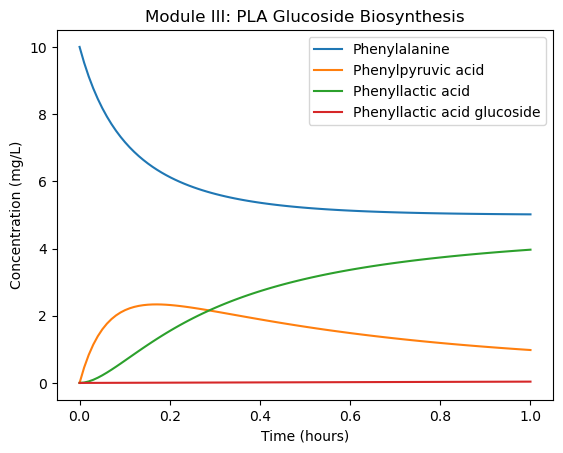

In [58]:
#Module III: PLA glucoside biosynthesis

from biocrnpyler import *

# Define species
Phe = Species("Phenylalanine")
PPA = Species("Phenylpyruvic_acid")
PLA = Species("Phenyllactic_acid")
PLA_glucoside = Species("Phenyllactic_acid_glucoside")

# Enzymes
Aro = Species("Aro_enzyme")  # Aro8/Aro9
WfPPR = Species("WfPPR_enzyme")
AbUGT = Species("AbUGT_enzyme")
Egh1 = Species("Egh1_enzyme")  # Inhibitor of glucosylation

# Reaction rates
k1 = 1.0
k2 = 1.0
k3 = 1.0 


# Reactions
#Phenylalanine → Phenylpyruvic acid via Aro8 / Aro9
R1_module3 = Reaction.from_massaction([Phe, Aro], [PPA], k_forward =k1)
#Phenylpyruvic acid → Phenyllactic acid (PLA) via WfPPR 
R2_module3 = Reaction.from_massaction([PPA, WfPPR], [PLA], k_forward = k2)
#Phenyllactic acid → Phenyllactic acid glucoside (PLA_glucoside) via AbUGT
R3_module3 = Reaction.from_massaction([PLA, AbUGT], [PLA_glucoside], k_forward = k3)
# PLA glucosylation inhibited by Egh1
hill_neg = HillNegative(k=1.0, s1=Egh1, K=1.0, n=2)
R3_module3 = Reaction([PLA, AbUGT], [PLA_glucoside], propensity_type=hill_neg)



# Build CRN
species = [Phe, PPA, PLA, PLA_glucoside, Aro, WfPPR, AbUGT, Egh1]
reactions = [R1_module3, R2_module3, R3_module3]

CRN = ChemicalReactionNetwork(species=species, reactions=reactions)
print ("MODULE 3: PLA glucoside biosynthesis")
print("Species = " + ", ".join([str(s) for s in CRN.species]))
print(CRN.pretty_print(show_materials = True, show_rates = True, show_attributes = True))

#Save CRN
CRN.write_sbml_file("Module3.xml")

# Simulate and plot
try:
    import bioscrape
    import numpy as np
    import pylab as plt
    import pandas as pd
    # Correct initial conditions
    x0 = {
        "Phenylalanine": 10,
        "Phenylpyruvic_acid": 0,
        "Phenyllactic_acid": 0,
        "Phenyllactic_acid_glucoside": 0,
        "Aro_enzyme": 5,
        "WfPPR_enzyme": 5,
        "AbUGT_enzyme": 5,
        "Egh1_enzyme": 5
    }
    timepoints = np.linspace(0, 1, 100)
    # Run the simulation
    R = CRN.simulate_with_bioscrape_via_sbml(timepoints=timepoints, initial_condition_dict=x0)
    # Plot results
    plt.plot(R['time'], R["Phenylalanine"], label="Phenylalanine")
    plt.plot(R['time'], R["Phenylpyruvic_acid"], label="Phenylpyruvic acid")
    plt.plot(R['time'], R["Phenyllactic_acid"], label="Phenyllactic acid")
    plt.plot(R['time'], R["Phenyllactic_acid_glucoside"], label="Phenyllactic acid glucoside")
    plt.legend()
    plt.xlabel("Time (hours)")
    plt.ylabel("Concentration (mg/L)")
    plt.title("Module III: PLA Glucoside Biosynthesis")
    
except ModuleNotFoundError:
    print("Plotting Modules not installed.")
    

Module V: TA scaffold biosynthesis
Species = Tropine, Phenyllactic_acid_glucoside, Littorine, NtJAT1_transporter, AbLS_DsRed_enzyme
Species(N = 5) = {
Tropine (@ 0),  Phenyllactic_acid_glucoside (@ 0),  NtJAT1_transporter (@ 0),  Littorine (@ 0),  AbLS_DsRed_enzyme (@ 0),  
}

Reactions (2) = [
0. Tropine+NtJAT1_transporter --> Tropine
 Kf=k_forward * Tropine * NtJAT1_transporter
  k_forward=1.0

1. Phenyllactic_acid_glucoside+Tropine+AbLS_DsRed_enzyme --> Littorine
 Kf=k_forward * Phenyllactic_acid_glucoside * Tropine * AbLS_DsRed_enzyme
  k_forward=1.0

]


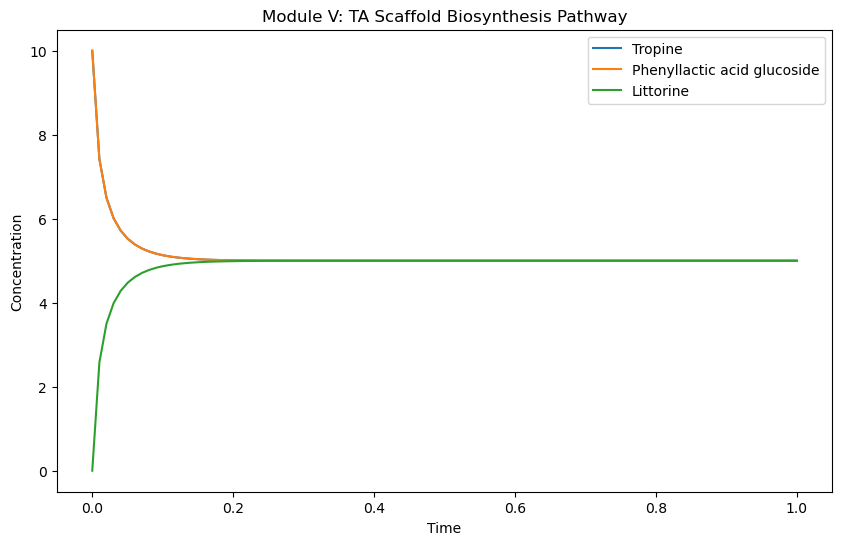

In [49]:
# Module V: TA scaffold biosynthesis

from biocrnpyler import *

#Species
Tropine = Species("Tropine") # Acyl acceptor
PLA_glucoside = Species ("Phenyllactic_acid_glucoside")  # Acyl donor
Littorine = Species("Littorine") # Product

## Transporter and enzyme
NtJAT1 = Species("NtJAT1_transporter")
AbLS_DsRed = Species("AbLS_DsRed_enzyme")

#Rates
k1 = 1.0
k2 = 1.0

# Tropine → Tropine (catalyzed by NtJAT1)
R1_module5 = Reaction.from_massaction([Tropine, NtJAT1], [Tropine], k_forward=k1)
# PLA-glucoside + Tropine → Littorine (catalyzed by AbLS_DsRed)
R2_module5 = Reaction.from_massaction([PLA_glucoside, Tropine, AbLS_DsRed], [Littorine], k_forward=k2)


# Assemble CRN
species = [Tropine, PLA_glucoside, Littorine, NtJAT1, AbLS_DsRed]
reactions = [R1_module5, R2_module5]

CRN = ChemicalReactionNetwork(species=species, reactions=reactions)
print ("Module V: TA scaffold biosynthesis")
print("Species = " + ", ".join([str(s) for s in CRN.species]))
print(CRN.pretty_print(show_materials=True, show_rates=True, show_attributes=True))

# Save the CRN to an SBML file
CRN.write_sbml_file("Module5.xml")

# Simulate and plot
try:
    import bioscrape
    import numpy as np
    import pylab as plt
    # Correct initial conditions
    x0 = {
        "Tropine": 10,
        "Phenyllactic_acid_glucoside": 10,
        "Littorine": 0,
        "NtJAT1_transporter": 5,
        "AbLS_DsRed_enzyme": 5
    }
    timepoints = np.linspace(0, 1, 100)
    # Run the simulation
    R = CRN.simulate_with_bioscrape_via_sbml(timepoints=timepoints, initial_condition_dict=x0)
    # Plot results
    plt.figure(figsize=(10, 6))
    plt.plot(R['time'], R["Tropine"], label="Tropine")
    plt.plot(R['time'], R["Phenyllactic_acid_glucoside"], label="Phenyllactic acid glucoside")
    plt.plot(R['time'], R["Littorine"], label="Littorine")
    plt.legend()
    plt.xlabel("Time")
    plt.ylabel("Concentration")
    plt.title("Module V: TA Scaffold Biosynthesis Pathway")
except ModuleNotFoundError:
    print("Plotting Modules not installed.")



Species = Littorine_cytosol, Hyoscyamine_aldehyde_ER, Hyoscyamine_cytosol, Scopolamine_cytosol, AbCYP80F1_ER, AtATR1_ER, DsHDH_cytosol, DsH6H_cytosol
Reactions = [
	Littorine --> Hyoscyamine_aldehyde
	Hyoscyamine_aldehyde --> Hyoscyamine
	Hyoscyamine --> Scopolamine
	Hyoscyamine_aldehyde <--> Hyoscyamine
]


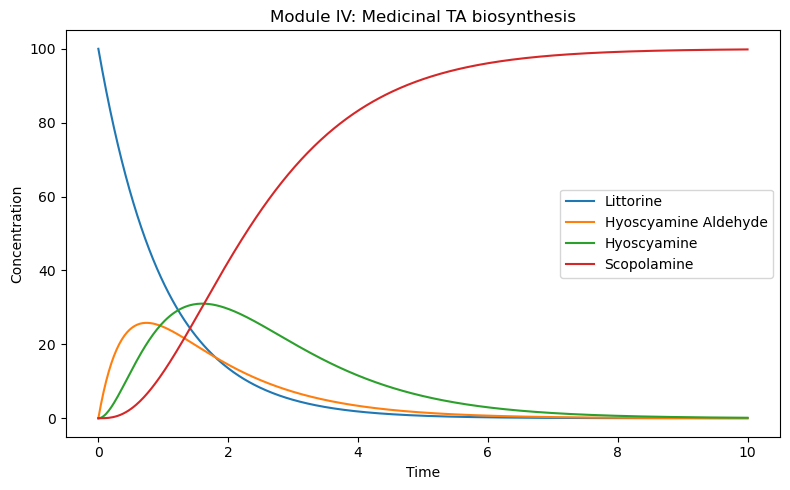

In [54]:
# Module IV: Medicinal TA biosynthesis

from biocrnpyler import Species, Reaction, ChemicalReactionNetwork, Compartment

# === Define compartments ===
cytosol = Compartment("cytosol", spatial_dimensions=3, size=1.0, initial_volume=1.0)
ER = Compartment("ER", spatial_dimensions=3, size=1.0, initial_volume=1.0)

# === Define species in compartments ===
Littorine = Species("Littorine", compartment=cytosol)
Hyoscyamine_aldehyde = Species("Hyoscyamine_aldehyde", compartment=ER)
Hyoscyamine = Species("Hyoscyamine", compartment=cytosol)
Scopolamine = Species("Scopolamine", compartment=cytosol)

# === Enzymes (not catalyzing in code, just included for context) ===
AbCYP80F1 = Species("AbCYP80F1", compartment=ER)
AtATR1 = Species("AtATR1", compartment=ER)
DsHDH = Species("DsHDH", compartment=cytosol)
DsH6H = Species("DsH6H", compartment=cytosol)

# === Define rate constants ===
k1 = 1.0  # Littorine → Hyoscyamine aldehyde
k2 = 1.0  # Hyoscyamine aldehyde → Hyoscyamine
k3 = 1.0  # Hyoscyamine → Scopolamine

# === Define reactions ===
R1 = Reaction.from_massaction([Littorine], [Hyoscyamine_aldehyde], k_forward=k1)
R1.name = "Littorine_to_HyoscyamineAldehyde"

R2 = Reaction.from_massaction([Hyoscyamine_aldehyde], [Hyoscyamine], k_forward=k2)
R2.name = "HyoscyamineAldehyde_to_Hyoscyamine"

R3 = Reaction.from_massaction([Hyoscyamine], [Scopolamine], k_forward=k3)
R3.name = "Hyoscyamine_to_Scopolamine"

# === Simulated transport between compartments ===
Transport = Reaction.from_massaction(
    [Hyoscyamine_aldehyde], [Hyoscyamine],
    k_forward=1.0, k_reverse=0.2
)
Transport.name = "Transport_HA_ER_to_Cytosol"

# === Build CRN ===
CRN = ChemicalReactionNetwork(
    species=[Littorine, Hyoscyamine_aldehyde, Hyoscyamine, Scopolamine,
             AbCYP80F1, AtATR1, DsHDH, DsH6H],
    reactions=[R1, R2, R3, Transport]
)

print(CRN)

# === Export SBML ===
CRN.write_sbml_file("tropane_pathway_compartments.xml")

# === Simulate with BioSCRAPE ===
try:
    import bioscrape
    import numpy as np
    import pylab as plt

    # Initial conditions
    x0 = {"Littorine_cytosol": 100}

    # Timepoints
    timepoints = np.linspace(0, 10, 500)

    # Simulate
    results = CRN.simulate_with_bioscrape_via_sbml(
        timepoints=timepoints,
        initial_condition_dict=x0
    )

    # Plot
    plt.figure(figsize=(8, 5))
    plt.plot(results["time"], results["Littorine_cytosol"], label="Littorine")
    plt.plot(results["time"], results["Hyoscyamine_aldehyde_ER"], label="Hyoscyamine Aldehyde")
    plt.plot(results["time"], results["Hyoscyamine_cytosol"], label="Hyoscyamine")
    plt.plot(results["time"], results["Scopolamine_cytosol"], label="Scopolamine")
    plt.xlabel("Time")
    plt.ylabel("Concentration")
    plt.title("Module IV: Medicinal TA biosynthesis")
    plt.legend()
    plt.tight_layout()
    plt.show()

except ModuleNotFoundError:
    print("Plotting Modules not installed.")
    

In [60]:
cytosol = "cytosol"
peroxisome = "peroxisome"
ER = "ER"



from biocrnpyler import Species, Reaction, ChemicalReactionNetwork

# Module 1 

# Species with compartments
A = Species("Glutamic_acid", compartment=cytosol)
B = Species("Arginine", compartment=cytosol)
C = Species("Ornithine", compartment=cytosol)
D = Species("Spermine", compartment= cytosol)
E = Species("Putrescine", compartment=cytosol)
F = Species("Agmatine", compartment=cytosol)
G = Species("Spermidine", compartment=cytosol)
#Enzymes
Arg2  = Species("Arg2_enzyme", compartment=cytosol)
AsADC = Species("AsADC_enzyme", compartment=cytosol)
speB  = Species("speB_enzyme", compartment=cytosol)
Car1  = Species("Car1_enzyme", compartment=cytosol)
Spe1  = Species("Spe1_enzyme", compartment=cytosol)
Fms1  = Species("Fms1_enzyme", compartment=cytosol) 
#Rates
k1 = 3.0
k2 = 1.4
k3 = 1.0 
k4 = 1.0

# Reactions
R1_module1 = Reaction.from_massaction([A, Arg2], [B], k_forward=k1)
# Parallel Path 1: Arginine → Agmatine → Putrescine
R2_module1 = Reaction.from_massaction([B, AsADC], [F], k_forward=k2)
R3_module1 = Reaction.from_massaction([F, speB], [E], k_forward=k2)
# Parallel Path 2: Arginine → Ornithine → Putrescine
R4_module1 = Reaction.from_massaction([B, Car1], [C], k_forward=k3)
R5_module1 = Reaction.from_massaction([C, Spe1], [E], k_forward=k3)
# 3rd Biochemical Route: Spermine → Spermidine → Putrescine
R6_module1 = Reaction.from_massaction([D, Fms1], [G], k_forward=k4)
R7_module1 = Reaction.from_massaction([G, Fms1], [E], k_forward=k4)

# Module 2 

# Define species/ A=4
AA = Species("Putrescine", compartment=cytosol)
BB = Species("N_methylputrescine", compartment=cytosol)
CC = Species("Methylaminobutanal", material_type="compound", compartment=cytosol)
DD = Species("N_Methyl_pyrrolinium", compartment=cytosol)
EE = Species("Pyrrolidinyl_oxobutanoic_acid", compartment=cytosol)
FF = Species("Tropinone",compartment=cytosol)
GG = Species("Tropine",compartment= cytosol)

# Enzymes
AbPMT1_DsPMT1= Species("AbPMT1_DsPMT1_enzyme", compartment=cytosol)
DmMPO1C = Species("DmMPO1ΔC_PTS1_enzyme", compartment=peroxisome)
AbPYKS = Species("AbPYKS_enzyme_and_2x_malonyl_CoA_molecules",compartment= cytosol)
AbCYP82M3_AtATR1 = Species("AbCYP82M3_AtATR1_enzyme",compartment= ER) 
DsTR1 = Species("DsTR1_enzyme",compartment= cytosol) 

#Rates
k1 = 3.0
k2 = 1.4
k3 = 1.0 
k4 = 1.0
k5 = 1.0
#Reactions
R1_module2 = Reaction.from_massaction([AA, AbPMT1_DsPMT1], [BB], k_forward=k1)
R2_module2 = Reaction.from_massaction([BB, DmMPO1C], [CC], k_forward=k2)
R3_module2 = Reaction.from_massaction([CC], [DD], k_forward=k3)
R4_module2 = Reaction.from_massaction([DD, AbPYKS], [EE], k_forward=k4)
R5_module2 = Reaction.from_massaction([EE, AbCYP82M3_AtATR1], [FF], k_forward=k4)
R6_module2 = Reaction.from_massaction([FF, DsTR1], [GG], k_forward=k5)

# Module 3 
#Species
Phe = Species("Phenylalanine")
PPA = Species("Phenylpyruvic_acid")
PLA = Species("Phenyllactic_acid")
PLA_glucoside = Species("Phenyllactic_acid_glucoside")
#Enzymes
Aro = Species("Aro_enzyme")  # Aro8/Aro9
WfPPR = Species("WfPPR_enzyme")
AbUGT = Species("AbUGT_enzyme")
Egh1 = Species("Egh1_enzyme")  # inhibitor

#Reactions
#Phenylalanine → Phenylpyruvic acid via Aro8 / Aro9
R1_module3 = Reaction.from_massaction([Phe, Aro], [PPA], k_forward =k1)
#Phenylpyruvic acid → Phenyllactic acid (PLA) via WfPPR 
R2_module3 = Reaction.from_massaction([PPA, WfPPR], [PLA], k_forward = k2)
#Phenyllactic acid → Phenyllactic acid glucoside (PLA_glucoside) via AbUGT
R3_module3 = Reaction.from_massaction([PLA, AbUGT], [PLA_glucoside], k_forward = k3)
# PLA glucosylation inhibited by Egh1
hill_neg_module3 = HillNegative(k=1.0, s1=Egh1, K=1.0, n=2)
R3_module3 = Reaction([PLA, AbUGT], [PLA_glucoside], propensity_type=hill_neg)


# Module V 

#Species
Tropine = Species("Tropine")
PLA_glucoside = Species ("Phenyllactic_acid_glucoside")  
Littorine = Species("Littorine")

#Enzymes
NtJAT1 = Species("NtJAT1_transporter")
AbLS_DsRed = Species("AbLS_DsRed_enzyme")

#Rates
k1 = 1.0
k2 = 1.0
k3 = 1.0 

# Tropine → Tropine (catalyzed by NtJAT1)
R1_module5 = Reaction.from_massaction([Tropine, NtJAT1], [Tropine], k_forward=k1)
# PLA-glucoside + Tropine → Littorine (catalyzed by AbLS_DsRed)
R2_module5 = Reaction.from_massaction([PLA_glucoside, Tropine, AbLS_DsRed], [Littorine], k_forward=k2)

# Module IV 

#Species
Littorine_cyt = Species("Littorine", compartment=cytosol)
Hyoscyamine_aldehyde = Species("Hyoscyamine_aldehyde", compartment=ER)
Hyoscyamine = Species("Hyoscyamine", compartment=cytosol)
Scopolamine = Species("Scopolamine", compartment=cytosol)

#Enzymes
AbCYP80F1 = Species("AbCYP80F1", compartment=ER)
AtATR1_ER = Species("AtATR1", compartment=ER)
DsHDH = Species("DsHDH", compartment=cytosol)
DsH6H = Species("DsH6H", compartment=cytosol)

#Rate
k1 = 1.0  # Littorine → Hyoscyamine aldehyde
k2 = 1.0  # Hyoscyamine aldehyde → Hyoscyamine
k3 = 1.0  # Hyoscyamine → Scopolamine

#Reactions
R1_module4 = Reaction.from_massaction([Littorine_cyt], [Hyoscyamine_aldehyde], k_forward=k1)
R2_module4 = Reaction.from_massaction([Hyoscyamine_aldehyde], [Hyoscyamine], k_forward=k2)
R3_module4 = Reaction.from_massaction([Hyoscyamine], [Scopolamine], k_forward=k3)

Transport = Reaction.from_massaction(
    [Hyoscyamine_aldehyde], [Hyoscyamine],
    k_forward=1.0, k_reverse=0.2
)

# Combine all species 

all_species = [
    A, B, C, D, E, F, G, Arg2, AsADC, speB, Car1, Spe1, Fms1,            # Module 1
    AA, BB, CC, DD, EE, FF, GG, AbPMT1_DsPMT1, DmMPO1C, AbPYKS, AbCYP82M3_AtATR1, DsTR1,  # Module 2
    Phe, PPA, PLA, PLA_glucoside, Aro, WfPPR, AbUGT, Egh1,                # Module 3
    Tropine, PLA_glucoside, Littorine, NtJAT1, AbLS_DsRed,                # Module 5
    Littorine_cyt, Hyoscyamine_aldehyde, Hyoscyamine, Scopolamine,        # Module 4
    AbCYP80F1, AtATR1_ER, DsHDH, DsH6H
]

# === Combine all reactions ===

all_reactions = [
    R1_module1, R2_module1, R3_module1, R4_module1, R5_module1, R6_module1, R7_module1,                       # Module 1
    R1_module2, R2_module2, R3_module2, R4_module2, R5_module2, R6_module2,  # Module 2
    R1_module3, R2_module3, R3_module3,               # Module 3
    R1_module5, R2_module5,                           # Module 5
    R1_module4, R2_module4, R3_module4, Transport     # Module 4
]

# === Create combined CRN ===

combined_CRN = ChemicalReactionNetwork(species=all_species, reactions=all_reactions)

# === Define initial conditions for all species ===
x0 = {
    # Module 1 initial conditions
    "Glutamic_acid_cytosol": 10,
    "Arginine_cytosol": 0,
    "Ornithine_cytosol": 0,
    "Spermine_cytosol": 0,
    "Putrescine_cytosol": 0,
    "Agmatine_cytosol": 0,
    "Spermidine_cytosol": 0,
    "Arg2_enzyme_cytosol": 5,
    "AsADC_enzyme_cytosol": 5,
    "speB_enzyme_cytosol": 5,
    "Car1_enzyme_cytosol": 5,
    "Spe1_enzyme_cytosol": 5,
    "Fms1_enzyme_cytosol": 5,

    # Module 2 initial conditions
    "Putrescine": 0,
    "N_methylputrescine": 0,
    "Methylaminobutanal": 0,
    "N_Methyl_1_pyrrolinium": 0,
    "4_1_Methyl_2_pyrrodinyl_3_oxobutanoic_acids": 0,
    "Tropinone": 0,
    "Tropine": 0,
    "AbPMT1_enzyme": 5,
    "DsPMT1_enzyme": 5,
    "DmMPO1C_PTS1_enzyme": 5,
    "AbPYKS_enzyme_and_2x_malonyl_CoA_molecules": 5,
    "AbCYP82M3_enzyme": 5,
    "AtATR1_enzyme": 5,
    "DsTR1_enzyme": 5,

    # Module 3 initial conditions
    "Phenylalanine": 10,
    "Phenylpyruvic_acid": 0,
    "Phenyllactic_acid": 0,
    "Phenyllactic_acid_glucoside": 0,
    "Aro_enzyme": 5,
    "WfPPR_enzyme": 5,
    "AbUGT_enzyme": 5,
    "Egh1_enzyme": 5,

    # Module 5 initial conditions
    "NtJAT1_transporter": 5,
    "AbLS_DsRed_enzyme": 5,
    "Littorine": 0,

    # Module 4 initial conditions
    "Littorine_cytosol": 0,
    "Hyoscyamine_aldehyde_ER": 0,
    "Hyoscyamine_cytosol": 0,
    "Scopolamine_cytosol": 0,
    "AbCYP80F1_ER": 5,
    "AtATR1_ER": 5,
    "DsHDH_cytosol": 5,
    "DsH6H_cytosol": 5,
}

# === Simulate combined CRN ===
try:
    import bioscrape
    import pylab as plt

    timepoints = np.linspace(0, 10, 100)
    results = combined_CRN.simulate_with_bioscrape_via_sbml(
        timepoints=timepoints,
        initial_condition_dict=x0
    )



    # Module 1
    plt.plot(results["time"], results["Glutamic_acid_cytosol"], label="Glutamic acid")
    plt.plot(results["time"], results["Arginine_cytosol"], label="Arginine")
    plt.plot(results["time"], results["Putrescine_cytosol"], label="Putrescine")
    plt.plot(results["time"], results["Spermine_cytosol"], label="Spermine")

    # Module 2
    plt.plot(results["time"], results["N_methylputrescine"], label="N-Methylputrescine")
    plt.plot(results["time"], results["Tropine"], label="Tropine")

    # Module 3
    plt.plot(results["time"], results[" Phenylalanine"], label="Phenylalanine")
    plt.plot(results["time"], results["Phenyllactic_acid_glucoside"], label="Phenyllactic acid glucoside")

    # Module 5
    plt.plot(results["time"], results["Littorine"], label="Littorine")

    # Module 4
    plt.plot(results["time"], results["Hyoscyamine_aldehyde_ER"], label="Hyoscyamine aldehyde")
    plt.plot(results["time"], results["Hyoscyamine_cytosol"], label="Hyoscyamine")
    plt.plot(results["time"], results["Scopolamine_cytosol"], label="Scopolamine")

    plt.legend()
    plt.xlabel("Time")
    plt.ylabel("Concentration")
    plt.title("Combined Biosynthesis Pathway Simulation")
    plt.tight_layout()
    plt.show()

except ModuleNotFoundError:
    print("Plotting Modules not installed.")
  

line 270: (21116 [Error]) A <speciesReference> object must have the required attributes 'species' and 'constant', and may have the optional attributes 'metaid', 'sboTerm', 'name' 'id' and 'stoichiometry'. No other attributes from the SBML Level 3 Core namespace are permitted on a <speciesReference> object.
Reference: L3V2 Section 4.11
 The required attribute 'species' is missing from the <speciesReference> from the <reaction> with the id 'r8'.




SyntaxError: SBML File temp_sbml_file.xml cannot be read without errors (<string>)

In [ ]:

Module 1: Arginine metabolism → Putrescine

Module 2: Putrescine → Tropine

Module 3: Phenylalanine → PLA glucoside

Module 5: PLA glucoside + Tropine → Littorine

Module 4: Littorine → Hyoscyamine → Scopolamine




